In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"

In [3]:
# prompt: Write a Python code that can perform the following tasks.
# Read the CSV file, located on a given file path, into a pandas data frame, assuming that the first row of the file can be used as the headers for the data.

import pandas as pd
df = pd.read_csv(URL)
print(df.head())

   Unnamed: 0.1  Unnamed: 0 Manufacturer  Category  GPU  OS  CPU_core  \
0             0           0         Acer         4    2   1         5   
1             1           1         Dell         3    1   1         3   
2             2           2         Dell         3    1   1         7   
3             3           3         Dell         4    2   1         5   
4             4           4           HP         4    2   1         7   

   Screen_Size_inch  CPU_frequency  RAM_GB  Storage_GB_SSD  Weight_pounds  \
0              14.0       0.551724       8             256        3.52800   
1              15.6       0.689655       4             256        4.85100   
2              15.6       0.931034       8             256        4.85100   
3              13.3       0.551724       8             128        2.69010   
4              15.6       0.620690       8             256        4.21155   

   Price Price-binned  Screen-Full_HD  Screen-IPS_panel  
0    978          Low               0   

In [5]:
# prompt: Write a Python code that performs the following tasks.
# 1. Develops and trains a linear regression model that uses one best attribute of a data frame as the source variable to predict price as target variable.
# 2. Calculate and display the MSE and R^2 values for the trained model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])

# Find the correlation between each attribute and 'Price'
correlations = numeric_df.corr()['Price'].sort_values(ascending=False)

# Exclude 'Price' itself
best_attribute = correlations[1:2].index[0]

# Split data into training and testing sets
X = df[[best_attribute]]
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate MSE and R^2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best attribute used for prediction: {best_attribute}")
print(f"MSE: {mse}")
print(f"R-squared: {r2}")

Best attribute used for prediction: RAM_GB
MSE: 223893.6381336151
R-squared: 0.028509581898144787


Best attributes used for prediction: ['RAM_GB', 'CPU_core', 'CPU_frequency', 'Unnamed: 0.1', 'Unnamed: 0']
MSE: 181343.16736025203
R-squared: 0.21313910056886276


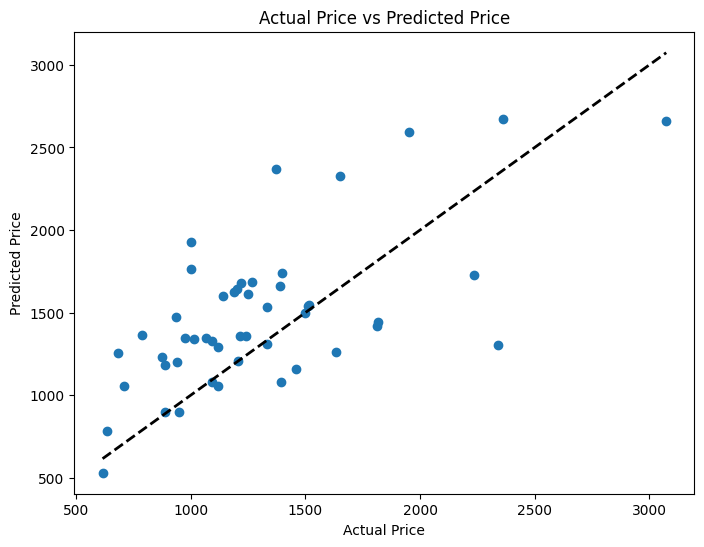

In [7]:
# prompt: Write a Python code that performs the following tasks.
# 1. Develops and trains a linear regression model that uses some best attributes of a data frame as the source variables and predicts the price as a target variable.
# 2. Calculate and display the MSE and R^2 values for the trained model.
# 3. plot a graph of prediction vs real value

import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'df' is your DataFrame and 'Price' is your target variable
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])

# Find the correlation between each attribute and 'Price'
correlations = numeric_df.corr()['Price'].sort_values(ascending=False)

# Exclude 'Price' itself
best_attributes = correlations[1:6].index.tolist()  # Use top 5 attributes for prediction

# Split data into training and testing sets
X = df[best_attributes]
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate MSE and R^2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best attributes used for prediction: {best_attributes}")
print(f"MSE: {mse}")
print(f"R-squared: {r2}")

# Plot a graph of prediction vs real value
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Add a diagonal line for reference
plt.show()


Polynomial Regression (Order 2):
  MSE: 218734.00513842402
  R-squared: 0.050897596392593836
Polynomial Regression (Order 3):
  MSE: 215498.3223131292
  R-squared: 0.06493745427776842
Polynomial Regression (Order 5):
  MSE: 220521.79184894997
  R-squared: 0.04314026271681837


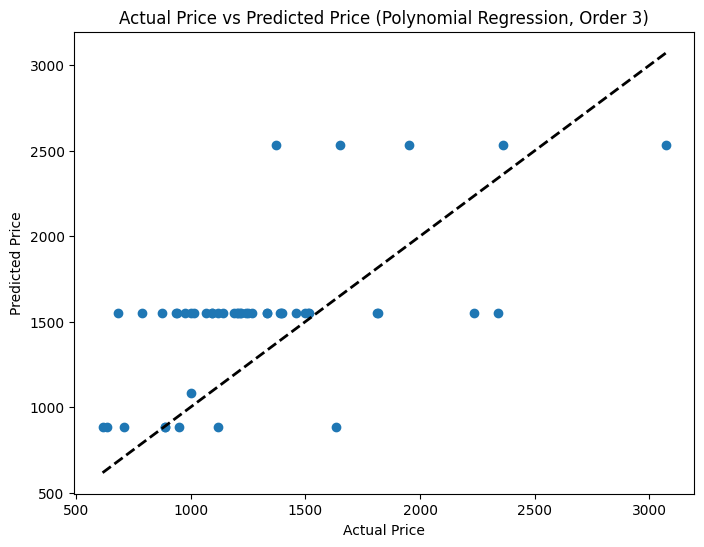

In [8]:
# prompt: Write a Python code that performs the following tasks.
# 1. Develops and trains multiple polynomial regression models, with orders 2, 3, and 5, that use one best attribute of a data frame as the source variable and price as a target variable.
# 2. Calculate and display the MSE and R^2 values for the trained models.
# 3. Compare the performance of the models.
# 4. plot one graph of predicted price of one b

import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'df' is your DataFrame and 'Price' is your target variable
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])

# Find the correlation between each attribute and 'Price'
correlations = numeric_df.corr()['Price'].sort_values(ascending=False)

# Exclude 'Price' itself
best_attribute = correlations[1:2].index[0]

# Split data into training and testing sets
X = df[[best_attribute]]
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train polynomial regression models with different orders
orders = [2, 3, 5]
for order in orders:
  poly = PolynomialFeatures(degree=order)
  X_train_poly = poly.fit_transform(X_train)
  X_test_poly = poly.transform(X_test)

  model = LinearRegression()
  model.fit(X_train_poly, y_train)

  y_pred = model.predict(X_test_poly)

  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  print(f"Polynomial Regression (Order {order}):")
  print(f"  MSE: {mse}")
  print(f"  R-squared: {r2}")

# Compare the performance of the models (based on MSE and R^2)

# Plot predicted price vs actual price for one of the models (e.g., order 3)
order_to_plot = 3
poly = PolynomialFeatures(degree=order_to_plot)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(f"Actual Price vs Predicted Price (Polynomial Regression, Order {order_to_plot})")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()


In [10]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Assume you have a pandas data frame called 'df' with two columns: 'RAM_GB' and 'Price'

# Extract the source variable and target variable from the data frame
X = df[['RAM_GB']] # Changed 'source_variable' to 'RAM_GB'
y = df['Price'] # Changed 'target_variable' to 'Price'

# Initialize lists to store the MSE and R^2 values for each model
mse_values = []
r2_values = []

# Loop through the polynomial orders
for order in [2, 3, 5]:
    # Create polynomial features
    polynomial_features = PolynomialFeatures(degree=order)
    X_poly = polynomial_features.fit_transform(X)

    # Initialize a linear regression model
    model = LinearRegression()

    # Train the model using the polynomial features and target variable
    model.fit(X_poly, y)

    # Make predictions using the trained model
    y_pred = model.predict(X_poly)

    # Calculate the mean squared error (MSE)
    mse = mean_squared_error(y, y_pred)

    # Calculate the coefficient of determination (R^2)
    r2 = r2_score(y, y_pred)

    # Append the MSE and R^2 values to the lists
    mse_values.append(mse)
    r2_values.append(r2)

    # Display the MSE and R^2 values for the current model
    print(f"Polynomial Order {order}:")
    print("Mean Squared Error (MSE):", mse)
    print("Coefficient of Determination (R^2):", r2)
    print()

# Compare the performance of the models
best_order = np.argmin(mse_values)
worst_order = np.argmax(mse_values) # Changed from argmax(r2_values) to argmax(mse_values) to find the worst order

print("Model Comparison:")
print(f"Best Polynomial Order: {best_order + 2}")
print(f"Worst Polynomial Order: {worst_order + 2}")

# Additional details:
# - The 'PolynomialFeatures' class from the 'sklearn.preprocessing' module is used to create polynomial features.
# - The 'fit_transform()' method is used to transform the source variable into polynomial features.
# - The 'degree' parameter in the 'PolynomialFeatures' class specifies the maximum degree of the polynomial features.
# - The 'argmin()' and 'argmax()' functions from the 'numpy' module are used to find the index of the minimum and maximum values in a list, respectively.

Polynomial Order 2:
Mean Squared Error (MSE): 227345.50447559214
Coefficient of Determination (R^2): 0.30853197675192645

Polynomial Order 3:
Mean Squared Error (MSE): 225478.14240080043
Coefficient of Determination (R^2): 0.31421153116195555

Polynomial Order 5:
Mean Squared Error (MSE): 223544.1051863433
Coefficient of Determination (R^2): 0.3200938770330719

Model Comparison:
Best Polynomial Order: 4
Worst Polynomial Order: 2


In [11]:
# prompt: Write a Python code that performs the following tasks.
# 1. Create a pipeline that performs parameter scaling, Polynomial Feature generation, and Linear regression. Use the set of multiple features as before to create this pipeline.
# 2. Calculate and display the MSE and R^2 values for the trained model.

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame and 'Price' is your target variable
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])

# Find the correlation between each attribute and 'Price'
correlations = numeric_df.corr()['Price'].sort_values(ascending=False)

# Exclude 'Price' itself
best_attributes = correlations[1:6].index.tolist()  # Use top 5 attributes for prediction

# Split data into training and testing sets
X = df[best_attributes]
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with StandardScaler, PolynomialFeatures, and LinearRegression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),  # You can adjust the degree
    ('linear', LinearRegression())
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Calculate MSE and R^2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R-squared: {r2}")


MSE: 175427.13964171056
R-squared: 0.2388091655590887


In [12]:
# prompt: Write a Python code that performs the following tasks.
# 1. Use polynomial features for some of the attributes of a data frame.
# 2. Perform Grid search on a ridge regression model for a set of values of hyperparameter alpha and polynomial features as input.
# 3. Use cross-validation in the Grid search.
# 4. Evaluate the resulting model's MSE and R^2 values.

import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame and 'Price' is your target variable
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])

# Find the correlation between each attribute and 'Price'
correlations = numeric_df.corr()['Price'].sort_values(ascending=False)

# Exclude 'Price' itself
best_attributes = correlations[1:6].index.tolist()  # Use top 5 attributes for prediction

# Split data into training and testing sets
X = df[best_attributes]
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create a pipeline with StandardScaler, PolynomialFeatures, and Ridge Regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures()),  # Polynomial degree will be tuned
    ('ridge', Ridge())  # Alpha will be tuned
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'poly__degree': [1, 2, 3],  # Try different polynomial degrees
    'ridge__alpha': [0.1, 1, 10]  # Try different alpha values
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Calculate MSE and R^2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Hyperparameters: {best_params}")
print(f"MSE: {mse}")
print(f"R-squared: {r2}")


Best Hyperparameters: {'poly__degree': 2, 'ridge__alpha': 10}
MSE: 168690.70233433272
R-squared: 0.26803904609886486
